In [1]:
#import 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Load the dataset
file_path = '/Users/UmaTrivedi/Documents/ibm_datathon/output.csv' 
data = pd.read_csv(file_path)

In [4]:
# Feature Engineering: Add 'Customer Tenure' and 'Total Spending'
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
today = datetime.today()
data['CustomerTenure'] = (today - data['Dt_Customer']).dt.days / 365  # Convert days to years

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['TotalSpending'] = data[product_columns].sum(axis=1)

In [5]:
# Selecting features for clustering
features = data[['Age', 'Income', 'Recency', 'NumTotalPurchase', 'FamilyMembers', 'CustomerTenure', 'TotalSpending']]
features = features.fillna(features.mean())  # Handling missing values

In [6]:
# Normalizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
# Perform K-Means clustering with 5 clusters (Changed from 4 to 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [8]:
# Summarizing the key characteristics of each cluster, but only including numeric columns
numeric_columns = ['Age', 'Income', 'Recency', 'NumTotalPurchase', 'FamilyMembers', 'CustomerTenure', 'TotalSpending']
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

               Age        Income    Recency  NumTotalPurchase  FamilyMembers  \
Cluster                                                                        
0        35.806400  30594.133513  44.912000          6.134400       2.491200   
1        50.132029  61907.993755  23.398533         17.024450       2.743276   
2        48.909278  42318.896683  59.575258          7.018557       3.511340   
3        52.166667  68057.772811  73.556373         19.164216       2.203431   
4        34.671233  76977.417334  43.363014         19.712329       1.674658   

         CustomerTenure  TotalSpending  
Cluster                                 
0             11.399399     111.883200  
1             11.297016     754.486553  
2             10.947945     142.125773  
3             11.471535    1140.823529  
4             11.281469    1466.208904  


# Function to plot any two variables colored by cluster
def plot_clusters(x_col, y_col, data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c=data['Cluster'], cmap='viridis', marker='o')
    plt.title(f'{x_col} vs {y_col} by Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.colorbar(label='Cluster')
    plt.show()

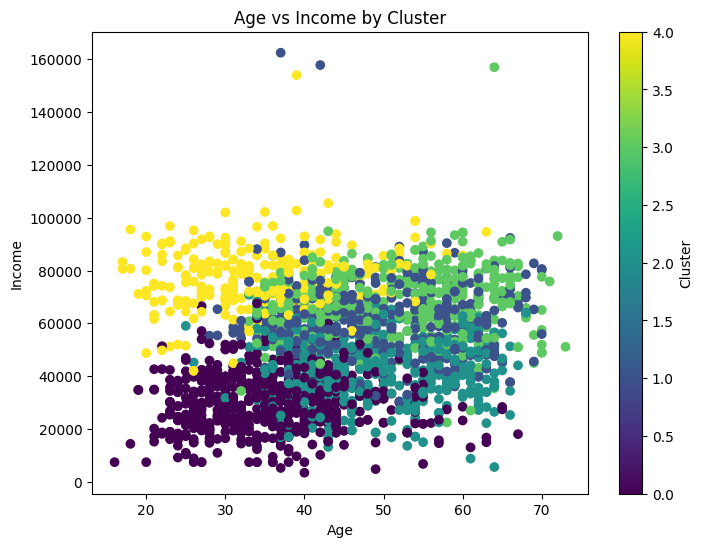

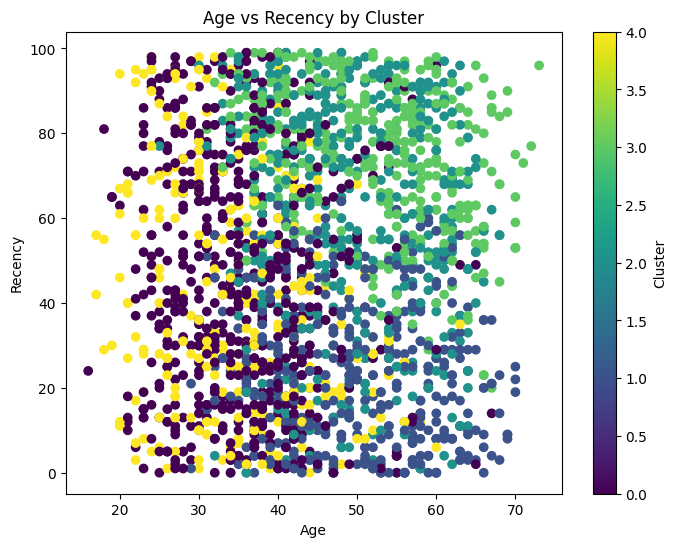

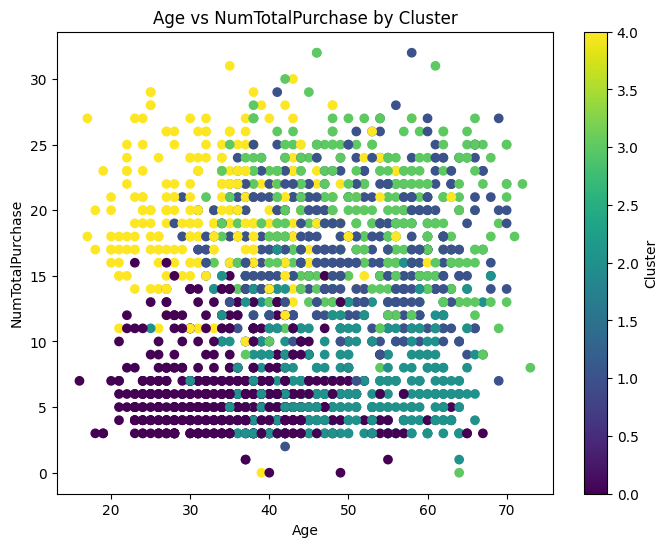

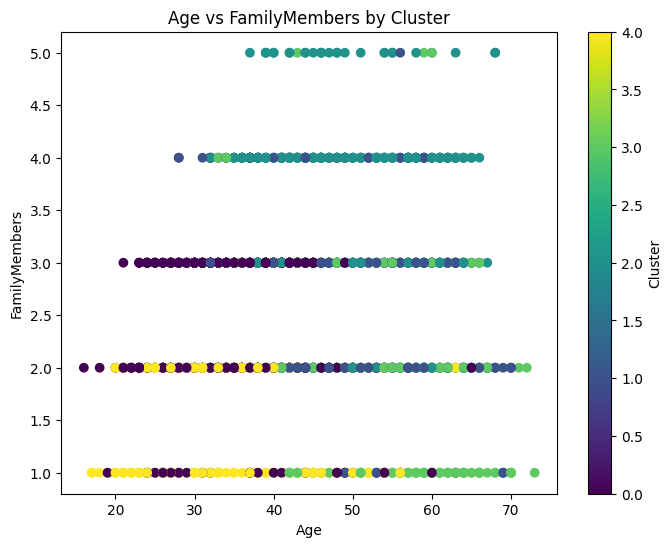

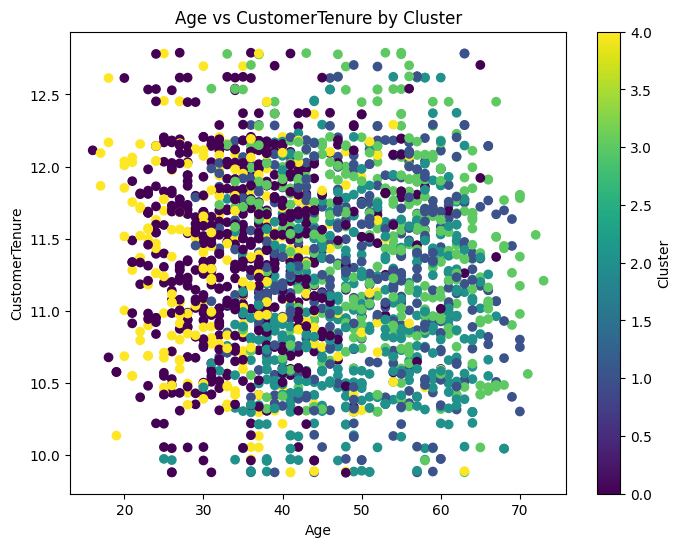

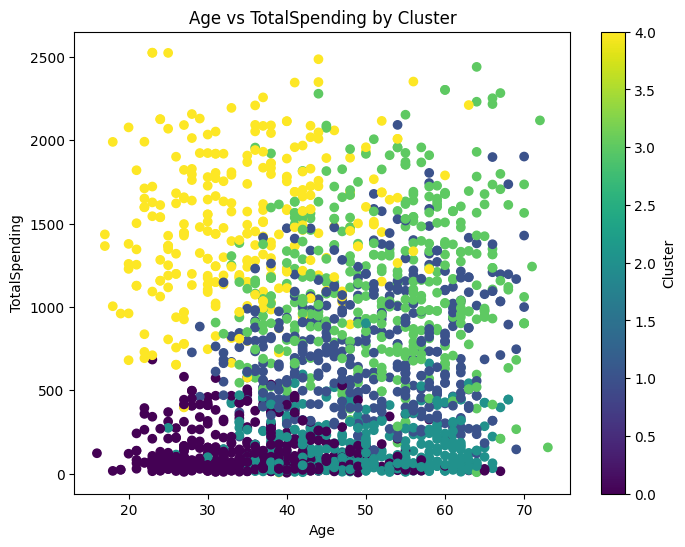

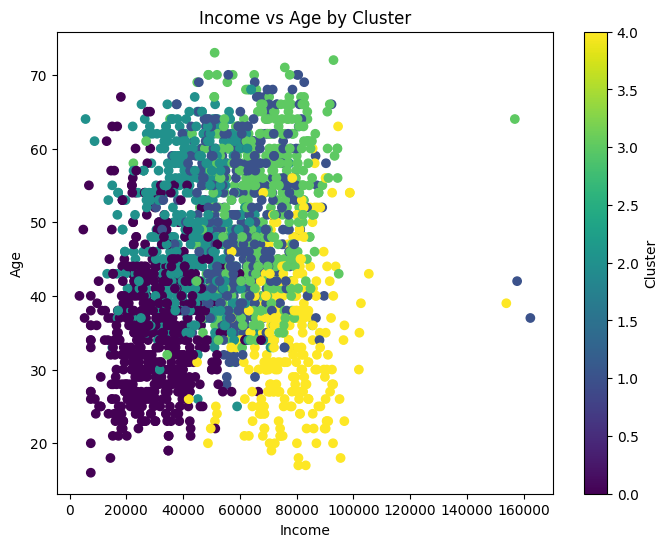

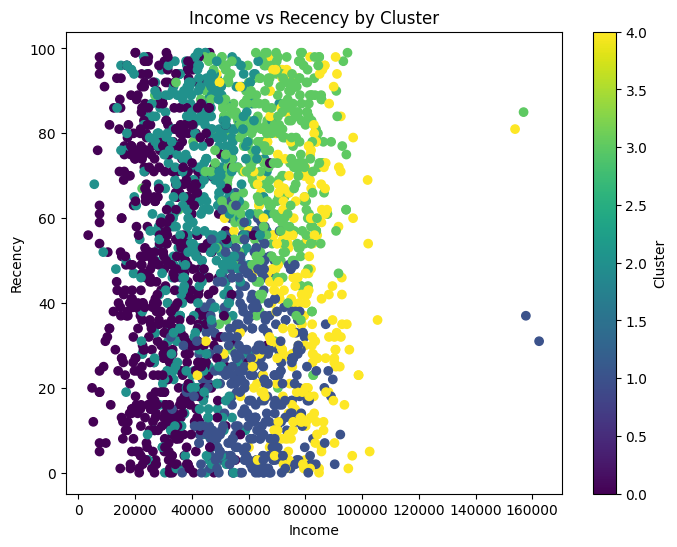

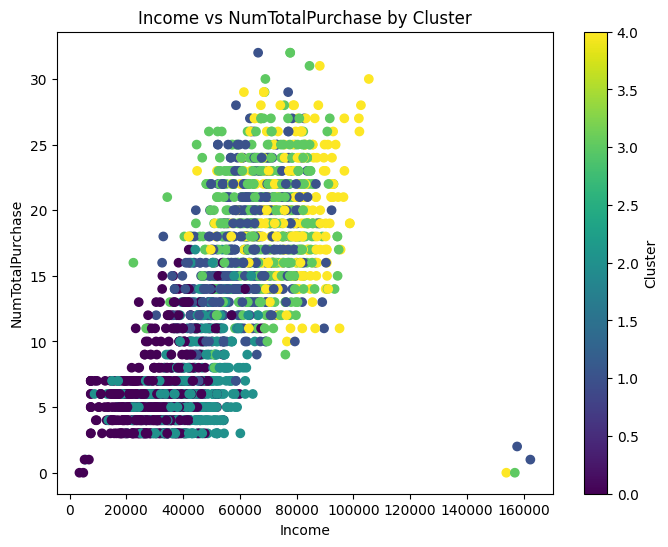

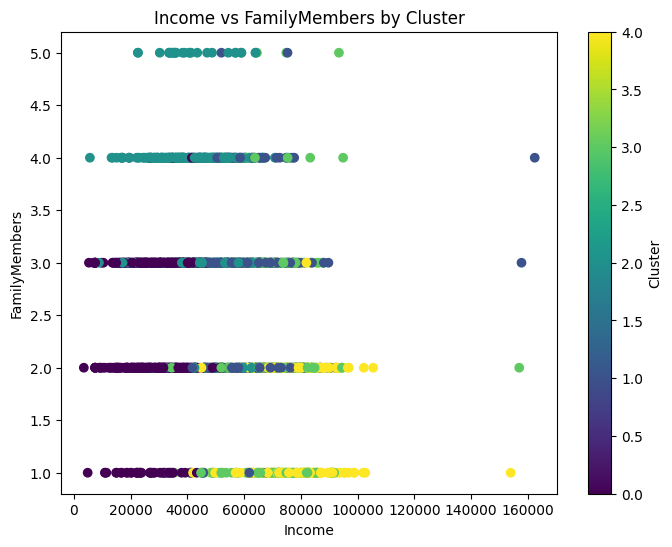

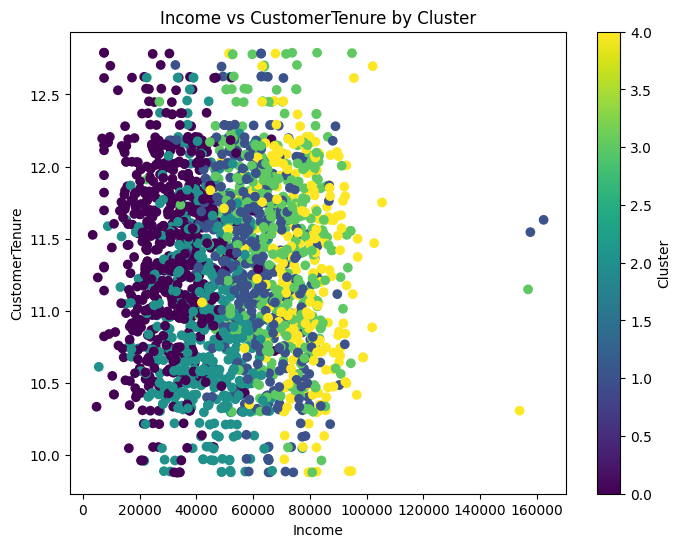

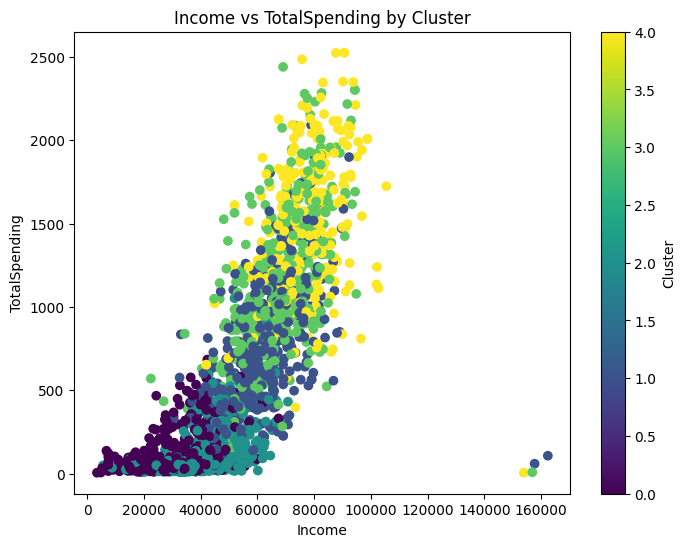

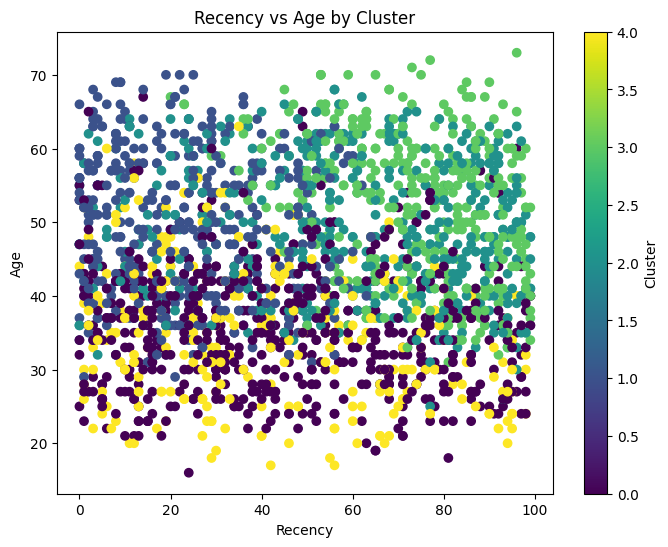

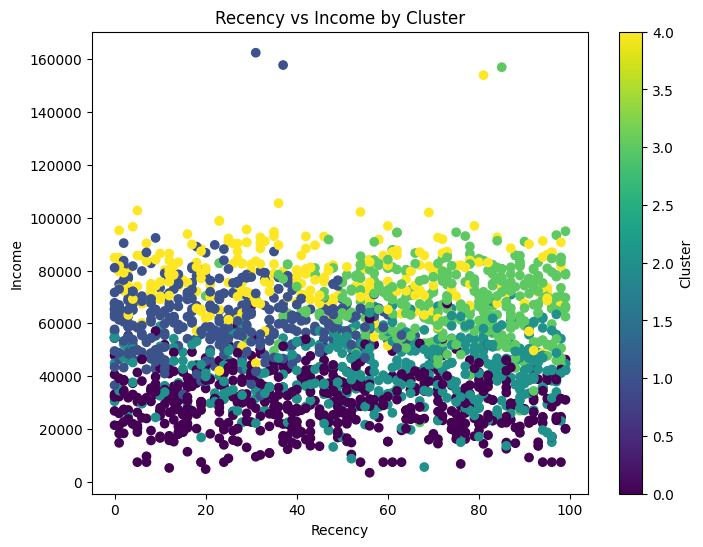

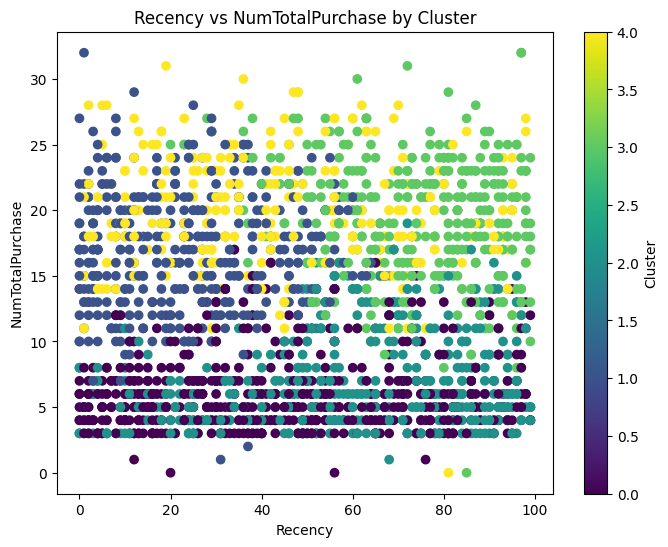

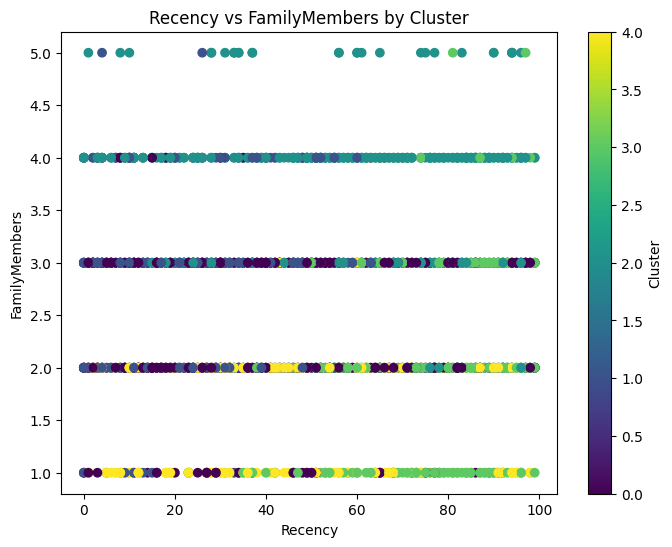

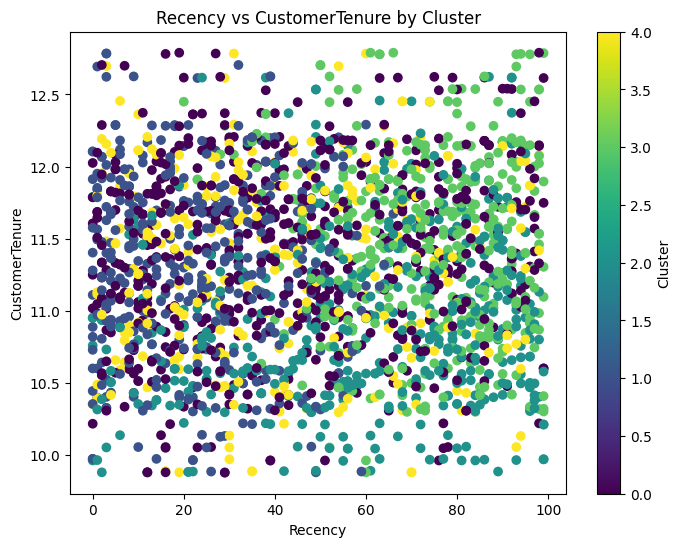

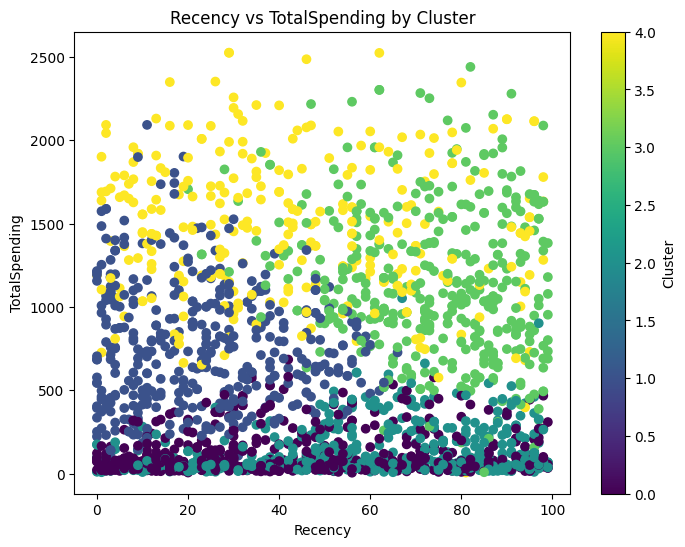

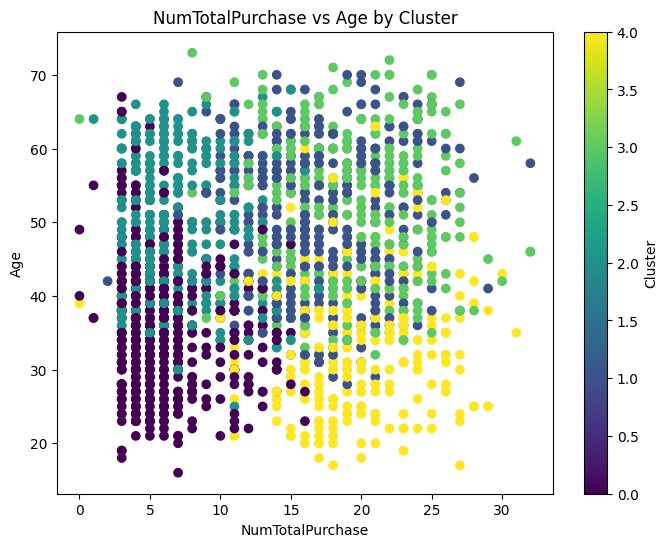

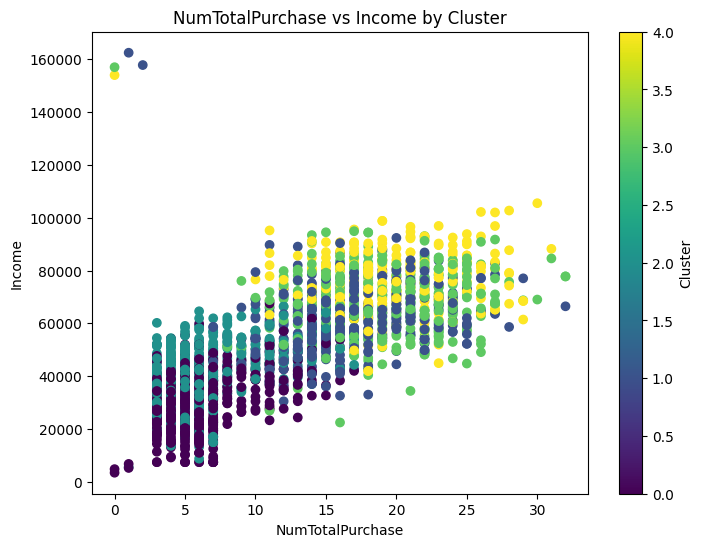

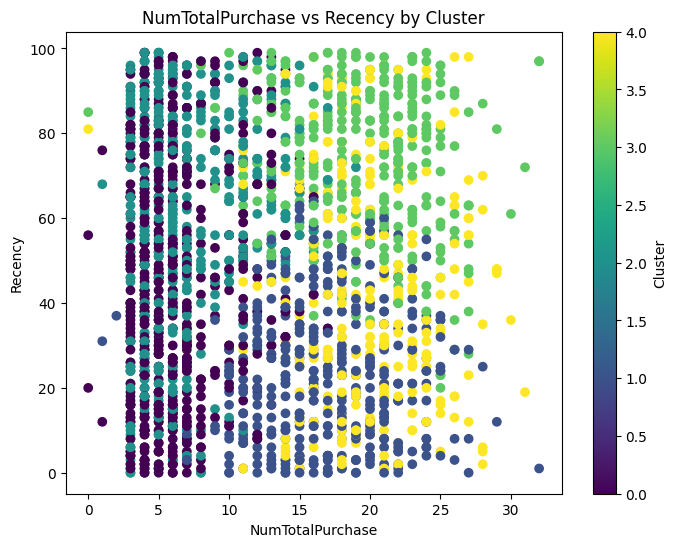

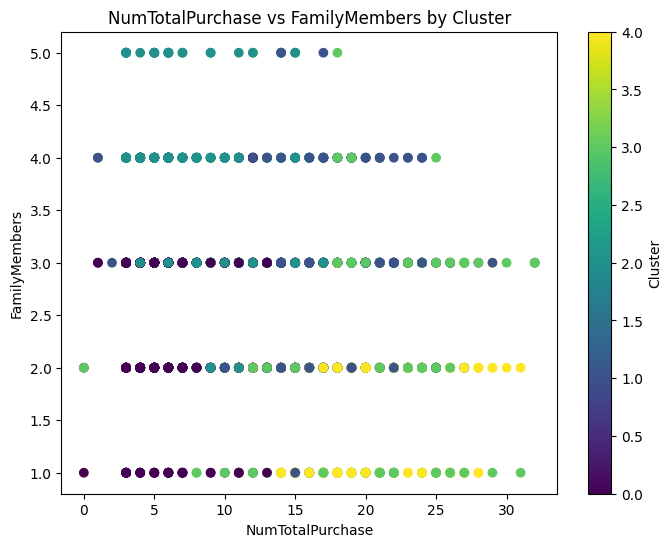

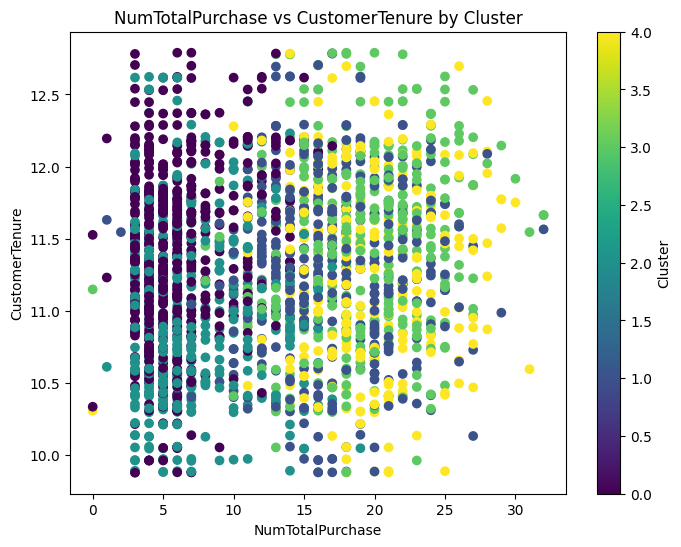

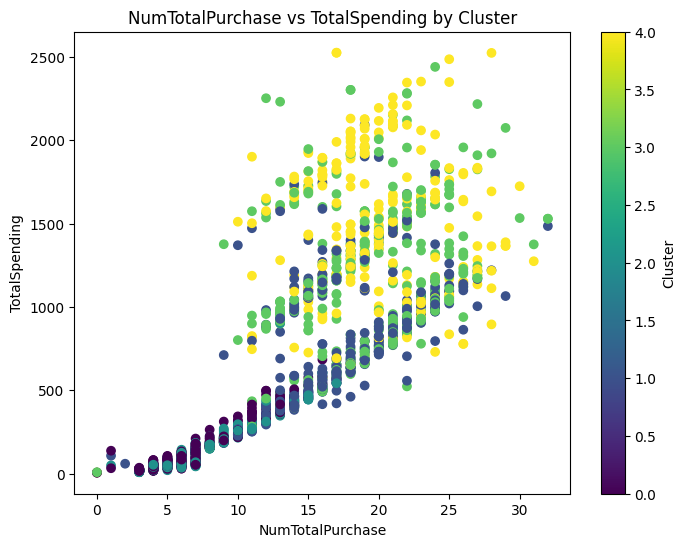

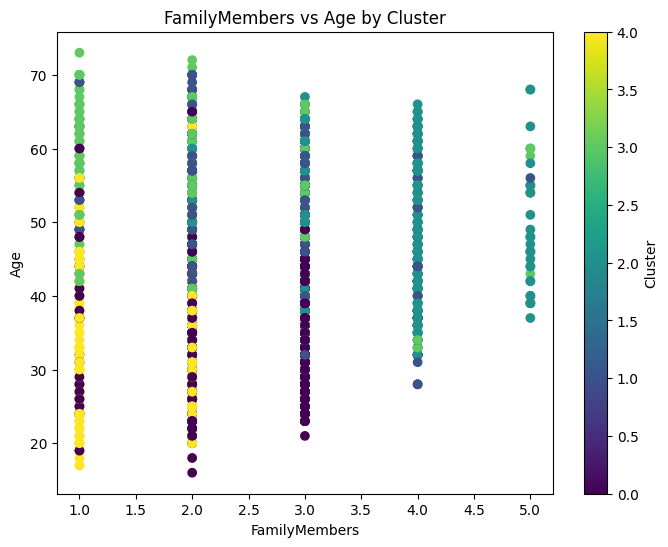

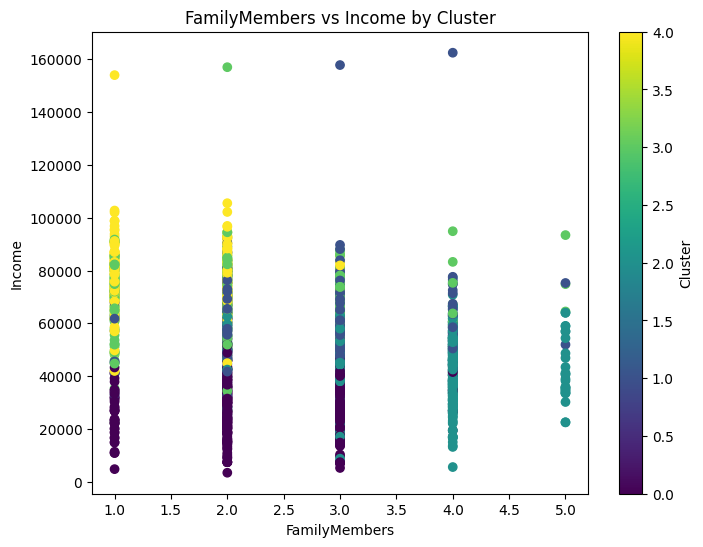

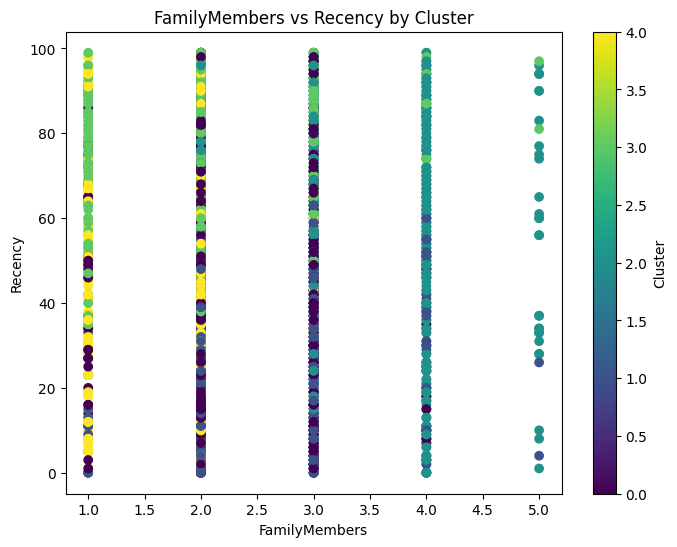

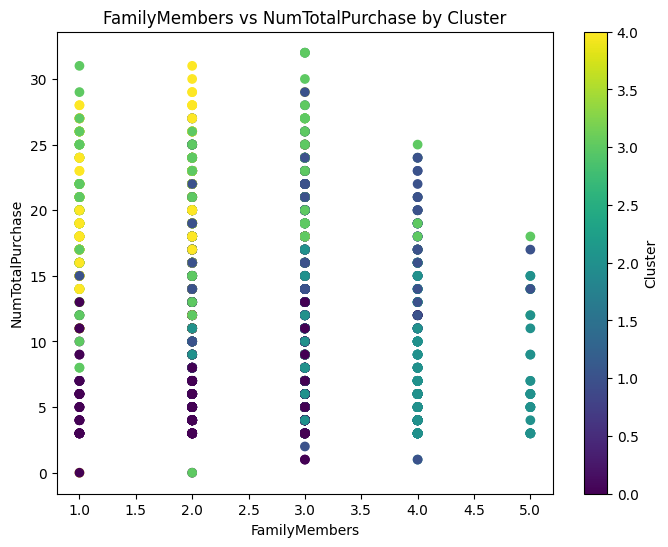

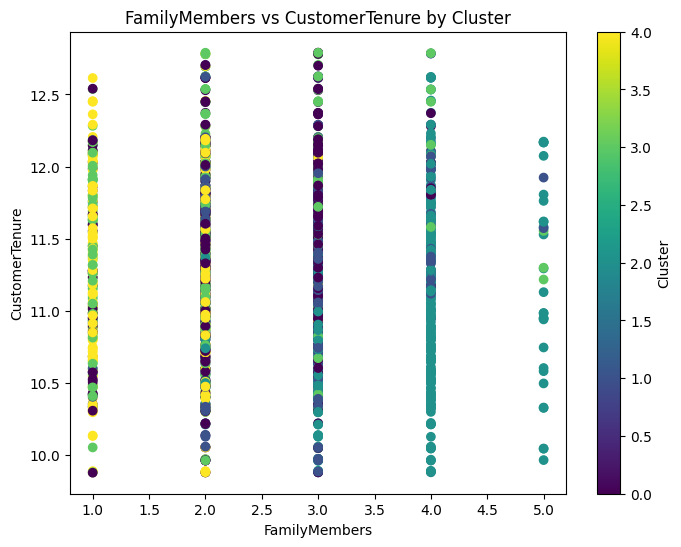

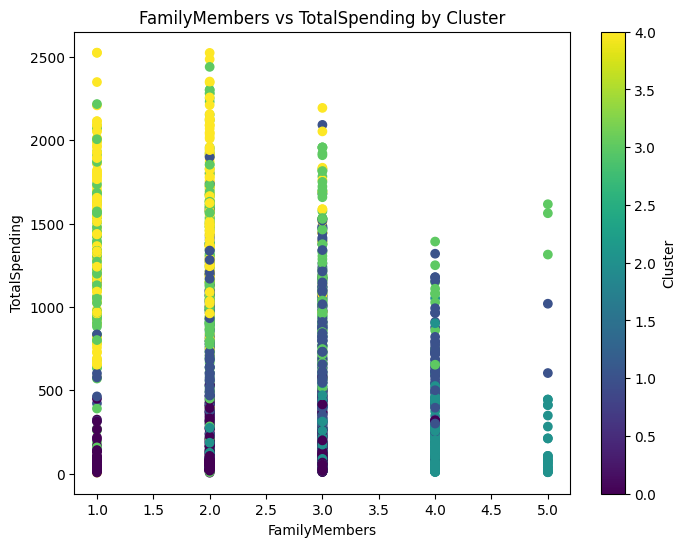

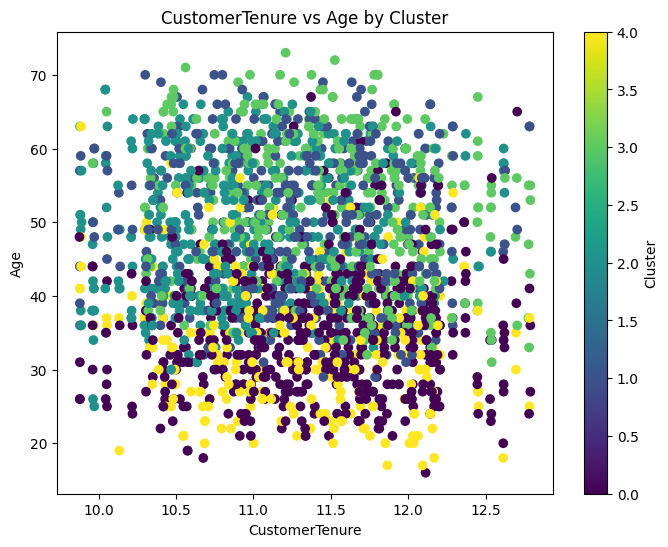

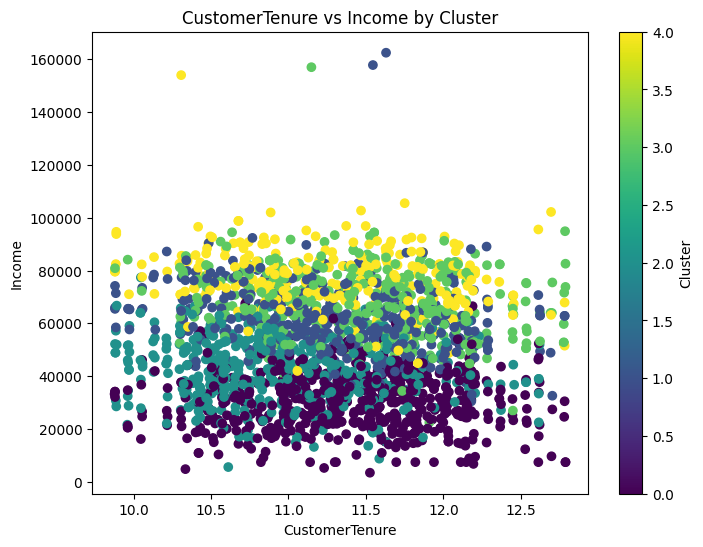

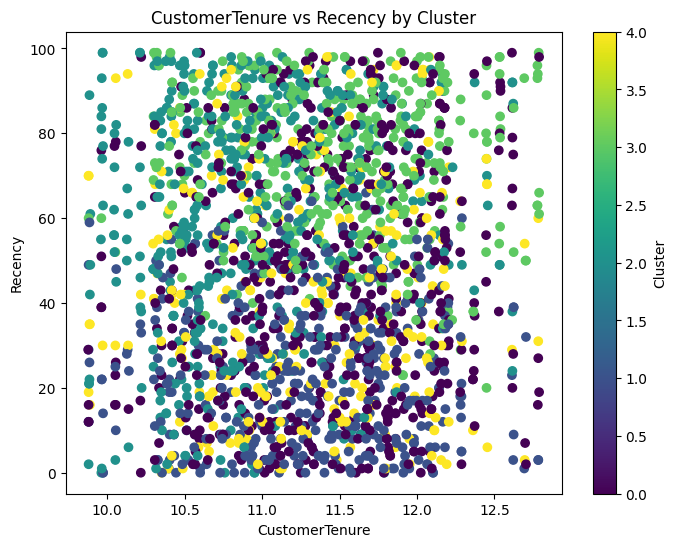

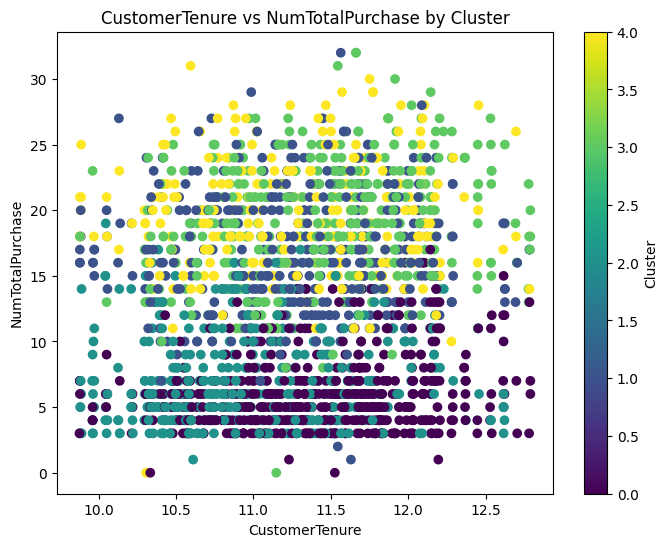

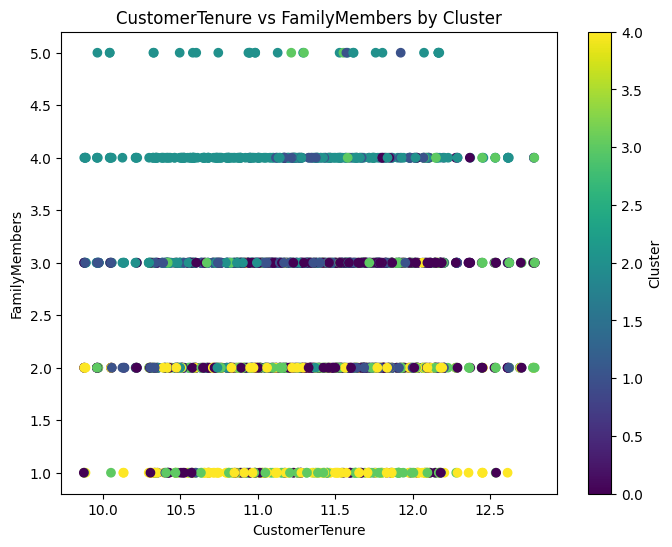

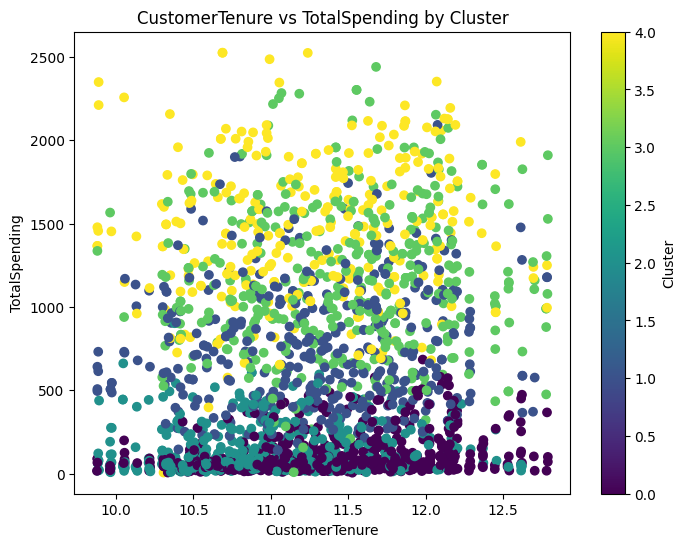

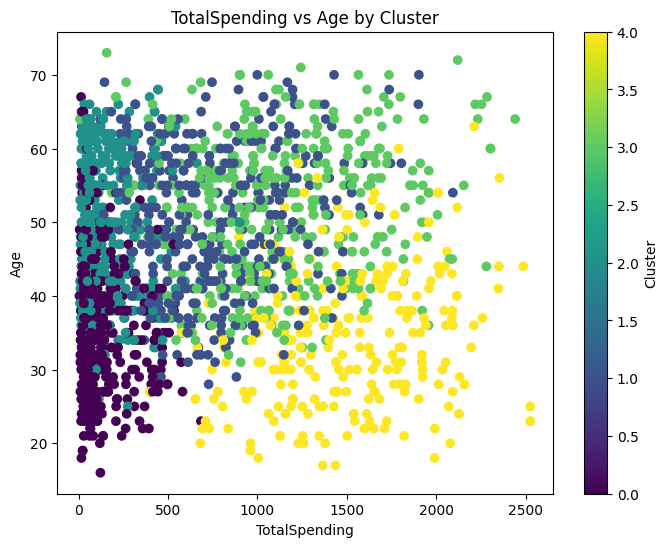

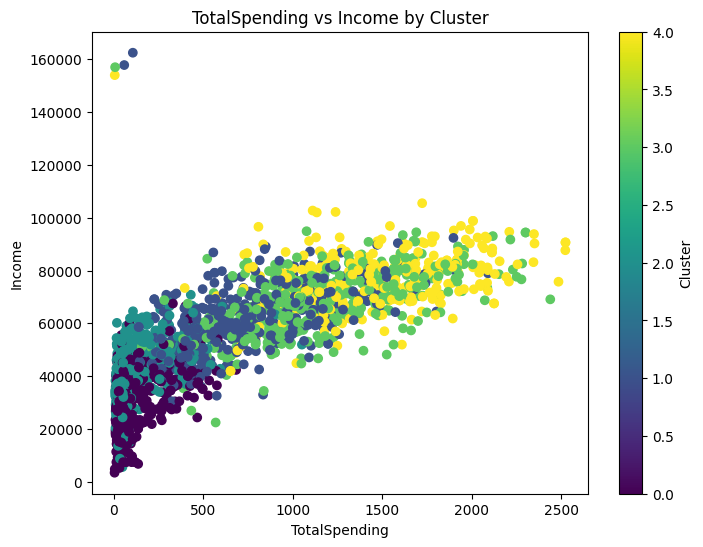

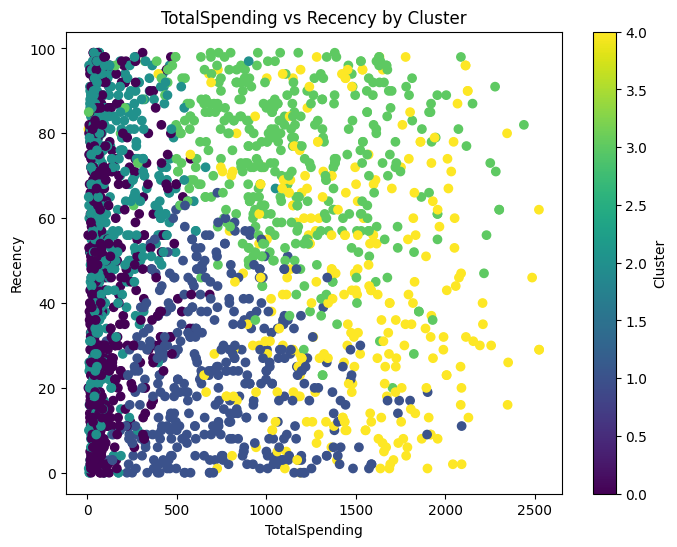

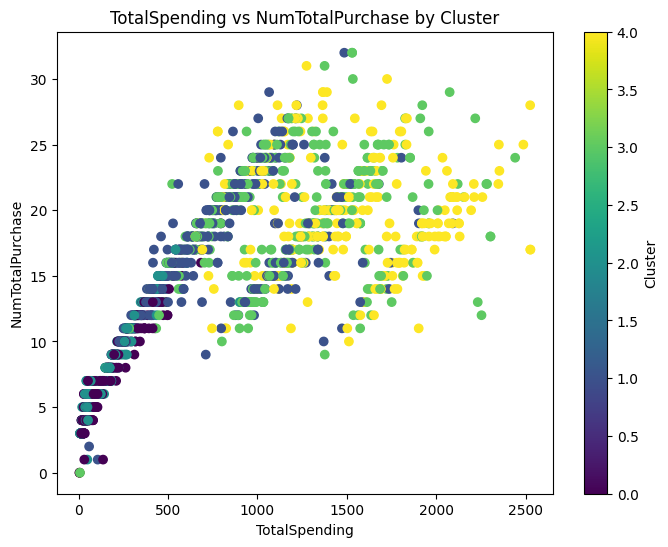

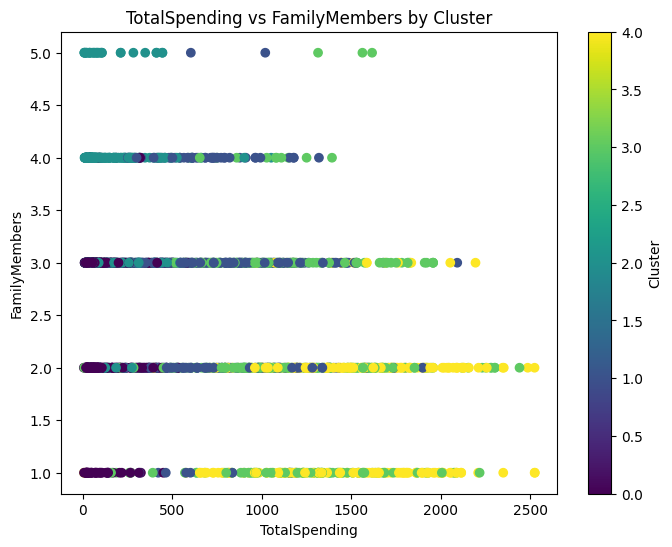

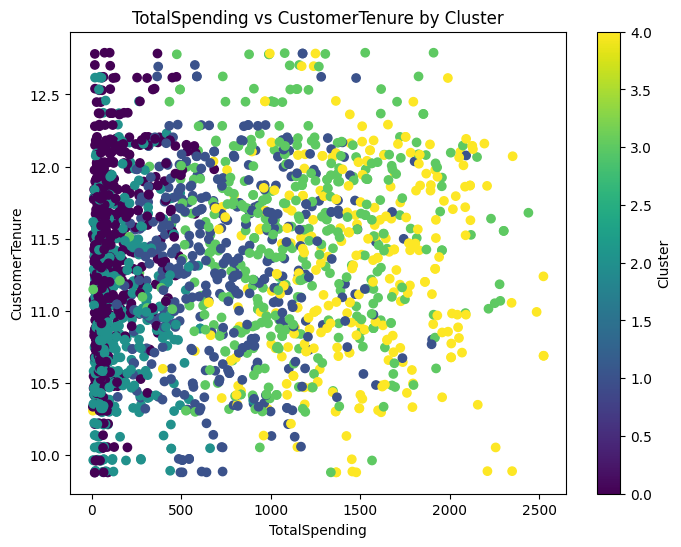

In [10]:
# Function to plot any two variables colored by cluster
def plot_clusters(x_col, y_col, data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_col], data[y_col], c=data['Cluster'], cmap='viridis', marker='o')
    plt.title(f'{x_col} vs {y_col} by Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.colorbar(label='Cluster')
    plt.show()
    
#  Plot all variables against each other in a pairwise fashion
features_to_plot = ['Age', 'Income', 'Recency', 'NumTotalPurchase', 'FamilyMembers', 'CustomerTenure', 'TotalSpending']

for i, x_col in enumerate(features_to_plot):
    for j, y_col in enumerate(features_to_plot):
        if i != j:  # Skip plots where x_col == y_col (no need to plot a variable against itself)
            plot_clusters(x_col, y_col, data)